# gaussian / bell curve / normal

inspired by https://youtu.be/UVvuwv-ne1I

In [1]:
import matplotlib.pyplot as plt
import torch as t

## utils

In [58]:
def _plot(formula, ax=None, title=None, start=-5, end=5, samples=1000):
    if ax is None: fig, ax = plt.subplots()
    x = t.linspace(start, end, samples)
    y = formula(x)
    if title is not None: ax.set_title(f'${title}$')
    ax.plot(x, y)

def plot(formulas):
    if not isinstance(formulas, list): formulas = [formulas]
    fig, axs = plt.subplots(1, len(formulas), figsize=(len(formulas) * 4, 3), squeeze=False)
    for formula, ax in zip(formulas, axs.flatten()):
        title = None
        if isinstance(formula, tuple): title, formula = formula
        _plot(formula, title=title, ax=ax)
    plt.show()


## building the gaussian

combining $e^{x}$ functions to build a rough gaussian shape

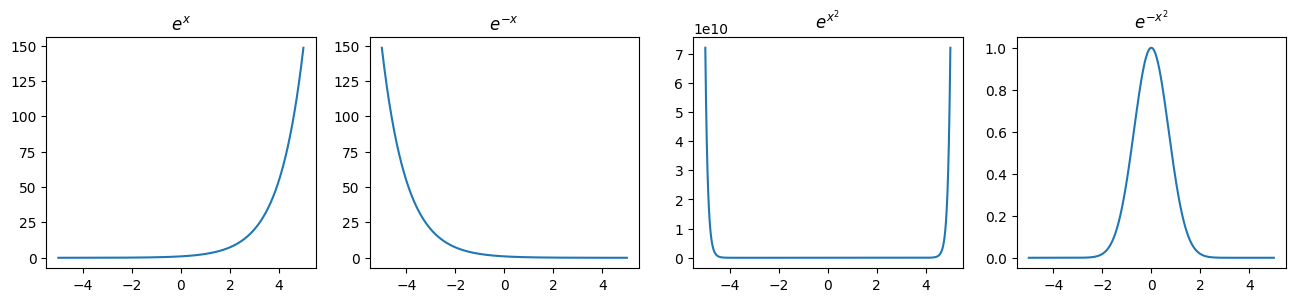

In [61]:
plot([
    (r'e^{x}', lambda x: t.exp(x)),
    (r'e^{-x}', lambda x: t.exp(-x)),
    (r'e^{x^{2}}', lambda x: t.exp(x**2)),
    (r'e^{-x^{2}}', lambda x: t.exp(-x**2)),
    ])

center it to the mean $\mu$

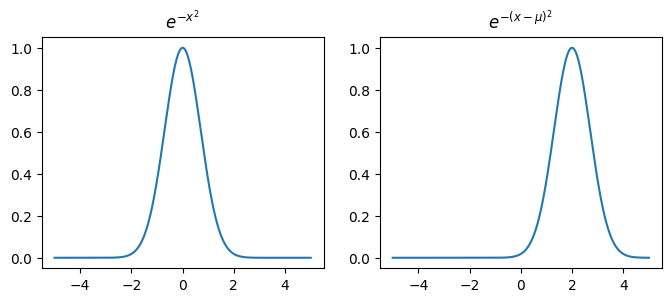

In [66]:
mu = 2
plot([
    (r'e^{-x^{2}}', lambda x: t.exp(-x**2)),
    (r'e^{-(x - \mu)^{2}}', lambda x: t.exp(-(x - mu)**2)),
    ])

scale it by the standard deviation $\sigma$

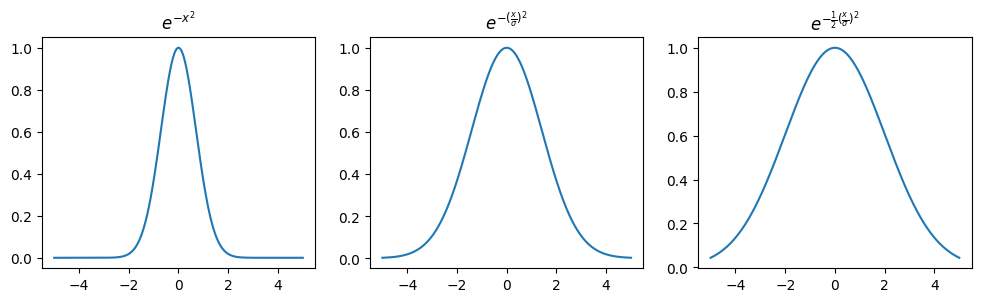

In [73]:
sigma = 2
plot([
    (r'e^{-x^{2}}', lambda x: t.exp(-x**2)),
    (r'e^{-(\frac{x}{\sigma})^{2}}', lambda x: t.exp(-(x / sigma)**2)),
    (r'e^{-\frac{1}{2}(\frac{x}{\sigma})^{2}}', lambda x: t.exp(-0.5 * (x / sigma)**2)),
    ])

combine both mean $\mu$ and std $\sigma$

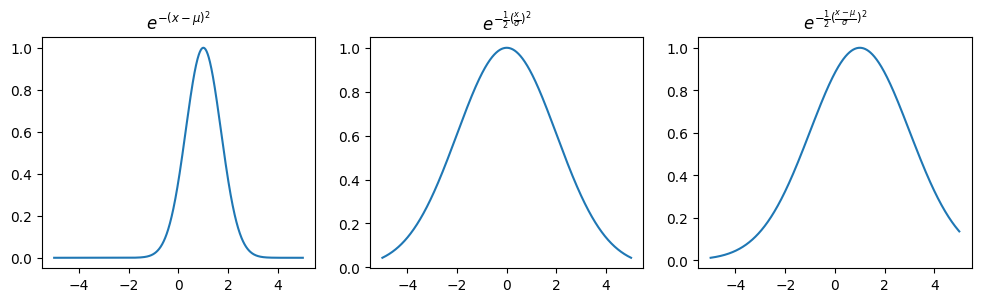

In [75]:
mu, sigma = 1, 2
plot([
    (r'e^{-(x - \mu)^{2}}', lambda x: t.exp(-(x - mu)**2)),
    (r'e^{-\frac{1}{2}(\frac{x}{\sigma})^{2}}', lambda x: t.exp(-0.5 * (x / sigma)**2)),
    (r'e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}}', lambda x: t.exp(-0.5 * ((x - mu) / sigma)**2)),
    ])

normalize to get a probability distribution

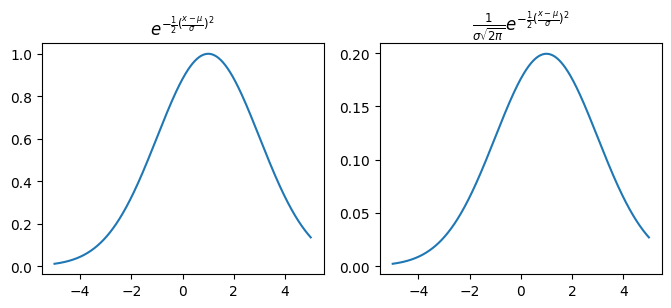

In [77]:
mu, sigma, pi = 1, 2, 3.1415
plot([
    (r'e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}}', lambda x: t.exp(-0.5 * ((x - mu) / sigma)**2)),
    (r'\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}}', lambda x: 1/(sigma * (2 * pi)**0.5) * t.exp(-0.5 * ((x - mu) / sigma)**2)),
    ])